# Question: What is the probability of drawing a skip card right after a nope card? Assume that no other card has been drawn and the deck has been properly shuffled.

I plan to conduct an prospective, observational study. The sample space is all cards in a standard deck for the game Exploding Kittens. One trial in this simulation would be drawing two random cards from the top of the deck, and the measured outcome would be the type of card drawn first and second.

In [1]:
import random as rd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("CardDistribution.csv")

In [24]:
total = df["Number"].sum()
countS = df.loc[df["Card"] == "Skip", "Number"].values[0]
countN = df.loc[df["Card"] == "Nope", "Number"].values[0]
sProb = countS / total
nProb = countN / total
tProb = sProb * nProb
print("The theoretical probability of drawing a skip card right after a nope card is:", tProb)

The theoretical probability of drawing a skip card right after a nope card is: 0.006377551020408163


In [36]:
# Expand deck into a list
def build_deck(df):
    deck = []
    for _, row in df.iterrows():
        deck.extend([row['Card']] * row['Number'])
    return deck

# Draw 2 cards (deck resets each time)
def draw_two(df):
    deck = build_deck(df)  # reset deck
    return rd.sample(deck, 2)

# Run simulation
num_draws = 1000
results = []

for i in range(num_draws):
    draw = draw_two(df)
    # Sort pair alphabetically so "Ace-King" = "King-Ace"
    pair = "-".join(sorted(draw))
    results.append(pair)

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Pair"])
# Count frequencies
counts = results_df['Pair'].value_counts()
print(counts)

Pair
See The Future-Skip                    21
Defuse-Nope                            20
Defuse-See The Future                  19
Attack-Cattermelon                     19
Defuse-Exploding Kittens               18
                                       ..
Cattermelon-Cattermelon                 3
Beard Cat-Beard Cat                     3
Exploding Kittens-Exploding Kittens     3
Nope-Nope                               2
Shuffle-Shuffle                         1
Name: count, Length: 91, dtype: int64


In [39]:
count = 0
for row in results_df.itertuples(index=True):
    if(row.Pair == "Nope-Skip"):
        count = count + 1
print(count)
eProb = count / num_draws
print("The empirical probability of drawing a skip card right after a nope card is:", eProb)

9
The empirical probability of drawing a skip card right after a nope card is: 0.009


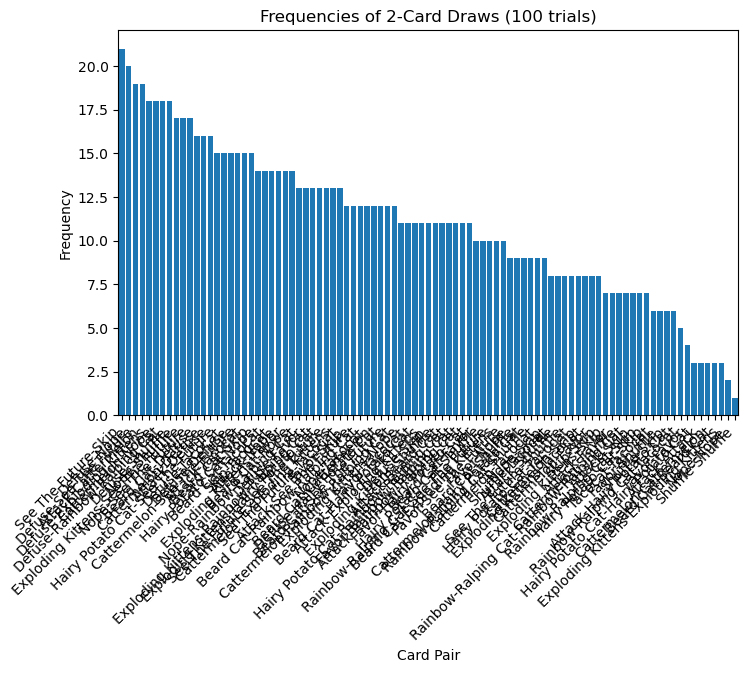

In [38]:
# Plot histogram
plt.figure(figsize=(8, 5))
counts.plot(kind="bar")
plt.title("Frequencies of 2-Card Draws (100 trials)")
plt.xlabel("Card Pair")
plt.ylabel("Frequency")
import textwrap

labels = [textwrap.fill(label, 10) for label in counts.index]  # wrap at 10 characters
plt.bar(labels, counts.values)
plt.xticks(rotation=45, ha="right")
plt.show()

# The theoretical probability of drawing a skip card right after a nope card is 0.6377%, and the empirical probability of drawing a skip card right after a nope card is 1.1%, which was calculated after 1000 trials.